# Goal

- Learn to implement the model f(w,b) for linear regression with one variable.

# Tools

- gonum, a library for scientific computing and plotting

In [28]:
import (
    "image/color"
    "log"
    
    "gonum.org/v1/gonum/mat"
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
)

# Problem Statement

The motivating example of this notebhook is to predict housing price. It will use a simple data set with only two data points:

| Size | Price | 
| -----| ------|
| 1000 | 300   |
| 2000 | 500   |

These two points will consitute our data or training set. In this project the units of size are 1000 sqft and the units of price are 1000s of dollars.

I will fit a linear regression model through these two points so I can then predict the price of other houses.

In [29]:
// mat.VecDense is used for 1 dimensional numeric vectors.
// mat.Formatted formats matrices/vecors
// mat.Prefix is adding space to align the output

// Variables are setup as global so following cells have access to them

// xTrain is the input variable (size in 1000 sqft)
var xTrain = mat.NewVecDense(2, []float64{1.0, 2.0})

// yTrain is the target (price in 1000s of dollars)
var yTrain = mat.NewVecDense(2, []float64{300.0, 500.0})

// %% is a shortcut for func main()
%%

fmt.Printf("xTrain = %v\n", mat.Formatted(xTrain, mat.Prefix("         ")))
fmt.Printf("yTrain = %v\n", mat.Formatted(yTrain, mat.Prefix("         ")))

xTrain = ⎡1⎤
         ⎣2⎦
yTrain = ⎡300⎤
         ⎣500⎦


# Number of training examples `m`

`m` denotes the number of training examples.

Gonum arrays have a `.Dims()` function that returns the dimensions of the array.

In [30]:
%%

// Returns the number of rows and columns of the vector/matrix.
// Ignore the columns return value since it is a 1 dimensional vector.
m, _ := xTrain.Dims()

fmt.Printf("xTrain has shape (%d, 1)\n", m)
fmt.Printf("Number of training examples is: %d", m)

xTrain has shape (2, 1)
Number of training examples is: 2

You can also use the `Len()` function.

In [31]:
%%

m := xTrain.Len()

fmt.Printf("Number of training examples is: %d", m)

Number of training examples is: 2

# Training example x_i, y_i

I will use `(x^i, y^i)` to denote the ***ith*** training example. Since Go is zero indexed `(x^0, y^0)` is `(1.0, 300.0)`

To access a value in a Gonum array, use the `AtVec()` function with the desired offset. For example the syntax to access location zero of `xTrain` is `xTrain.AtVec(0)`.

In [32]:
%%

index := 0

x_i := xTrain.AtVec(index)
y_i := yTrain.AtVec(index)

fmt.Printf("x^(%d), y^(%d) = (%.1f, %.1f)\n", index, index, x_i, y_i)

x^(0), y^(0) = (1.0, 300.0)


# Plotting the data

I will plot these two points using the `plot.New()` and `plotter.NewScatter()` functions.

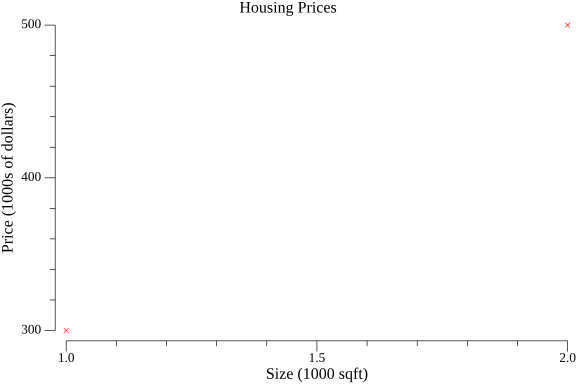

In [45]:
%%


// Create a new plot
plot := plot.New()
plot.Title.Text = "Housing Prices"
plot.X.Label.Text = "Size (1000 sqft)"
plot.Y.Label.Text = "Price (1000s of dollars)"

// Build XY points from VecDense
m := xTrain.Len()
points := make(plotter.XYs, m)
for i := 0; i < m; i++ {
    points[i].X = xTrain.AtVec(i)
    points[i].Y = yTrain.AtVec(i)
}

scatter, err := plotter.NewScatter(points)
if err != nil { log.Fatal(err) }

// Style the scatter points
scatter.GlyphStyle.Shape = draw.CrossGlyph{}
scatter.GlyphStyle.Color = color.RGBA{R: 255, A: 255}

// Add the scatter points to the plot
plot.Add(scatter)

// Save the plot as a png file
if err := plot.Save(6*vg.Inch, 4*vg.Inch, "scatter.png"); err != nil {
    log.Fatal(err)
}

// Display the plot
writer, err := plot.WriterTo(6*vg.Inch, 4*vg.Inch, "png")
if err != nil { log.Fatal(err) }
buffer := new(bytes.Buffer)

if _, err := writer.WriteTo(buffer); err != nil { log.Fatal(err) }

gonbui.DisplayPng(buffer.Bytes())

# Model function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as `f(w,b)(x^i) = wx^i + b`. Here `w` is weight and `b` is bias.

This forumla is how you can represent straight lines, different values of `w` and `b` give you different straight lines on a plot.

I'll start with a weight of 100 and bias of 100.

In [67]:
var w = 100.0
var b = 100.0

%%

fmt.Printf("weight: %.1f\n", w)
fmt.Printf("bias: %.1f\n", b)

weight: 100.0
bias: 100.0


Now I will compute the value of `f(w,b)(x^i) for the two data points. This can be explicitly written out as:

```
for x^0 = f_wb = w * x[0] + b
for x^1 = f_wb = w *x[1] + b
```

For a large number of data points this can get unweildy and repetitive. Instead I will use a function with a for loop.

In [68]:
// computeModelOutput takes a 1 dimensional vector and computes the prediction of a linear model.
func computeModelOutput(x *mat.VecDense, w, b float64) []float64 {
    m := x.Len()
    fwb := make([]float64, m)

    for i := 0; i < m; i++ {
        fwb[i] = w * x.AtVec(i) + b
    }

    return fwb
}

I will plot the results of `computeModelOutput()` into the plot.

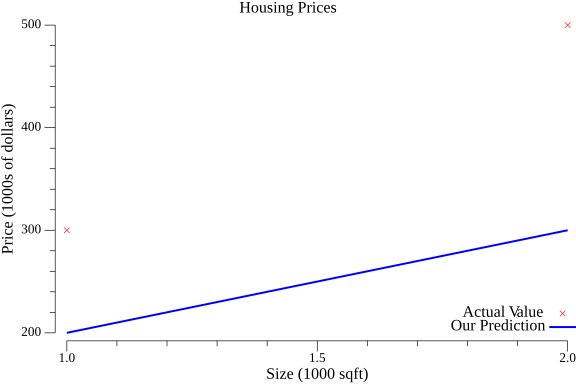

In [77]:
%%

tempFwb := computeModelOutput(xTrain, w, b)

// Create a new plot
plot := plot.New()
plot.Title.Text = "Housing Prices"
plot.X.Label.Text = "Size (1000 sqft)"
plot.Y.Label.Text = "Price (1000s of dollars)"

// Build XY points from VecDense
m := xTrain.Len()
points := make(plotter.XYs, m)
for i := 0; i < m; i++ {
    points[i].X = xTrain.AtVec(i)
    points[i].Y = yTrain.AtVec(i)
}

// Scatter the points
scatter, err := plotter.NewScatter(points)
if err != nil { log.Fatal(err) }

// Style the scatter points
scatter.GlyphStyle.Shape = draw.CrossGlyph{}
scatter.GlyphStyle.Color = color.RGBA{R: 255, A: 255}
scatter.GlyphStyle.Radius = vg.Points(3)
plot.Add(scatter)
plot.Legend.Add("Actual Value", scatter)

// Line: model prediction
pointsPrediction := make(plotter.XYs, xTrain.Len())
for i := 0; i < m; i++ {
    pointsPrediction[i].X = xTrain.AtVec(i)
    pointsPrediction[i].Y = tempFwb[i]
}
line, _ := plotter.NewLine(pointsPrediction)

// Style the line
line.LineStyle.Width = vg.Points(1.5)
line.LineStyle.Color = color.RGBA{B: 255, A: 255}
plot.Add(line)
plot.Legend.Add("Our Prediction", line)

// Display the plot
writer, err := plot.WriterTo(6*vg.Inch, 4*vg.Inch, "png")
if err != nil { log.Fatal(err) }
buffer := new(bytes.Buffer)

if _, err := writer.WriteTo(buffer); err != nil { log.Fatal(err) }

gonbui.DisplayPng(buffer.Bytes())

I need to adjust the weight of the model to make an accurate prediction.

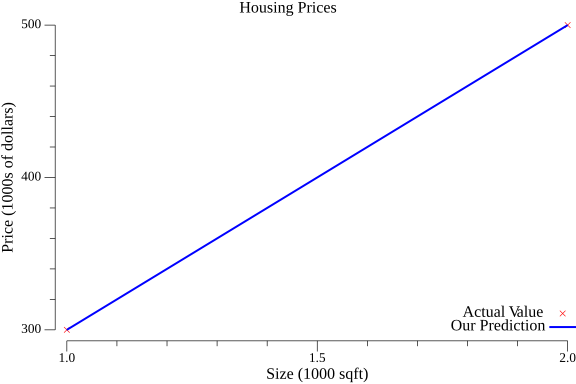

In [79]:
%%

w = 200

tempFwb := computeModelOutput(xTrain, w, b)

// Create a new plot
plot := plot.New()
plot.Title.Text = "Housing Prices"
plot.X.Label.Text = "Size (1000 sqft)"
plot.Y.Label.Text = "Price (1000s of dollars)"

// Build XY points from VecDense
m := xTrain.Len()
points := make(plotter.XYs, m)
for i := 0; i < m; i++ {
    points[i].X = xTrain.AtVec(i)
    points[i].Y = yTrain.AtVec(i)
}

// Scatter the points
scatter, err := plotter.NewScatter(points)
if err != nil { log.Fatal(err) }

// Style the scatter points
scatter.GlyphStyle.Shape = draw.CrossGlyph{}
scatter.GlyphStyle.Color = color.RGBA{R: 255, A: 255}
scatter.GlyphStyle.Radius = vg.Points(3)
plot.Add(scatter)
plot.Legend.Add("Actual Value", scatter)

// Line: model prediction
pointsPrediction := make(plotter.XYs, xTrain.Len())
for i := 0; i < m; i++ {
    pointsPrediction[i].X = xTrain.AtVec(i)
    pointsPrediction[i].Y = tempFwb[i]
}
line, _ := plotter.NewLine(pointsPrediction)

// Style the line
line.LineStyle.Width = vg.Points(1.5)
line.LineStyle.Color = color.RGBA{B: 255, A: 255}
plot.Add(line)
plot.Legend.Add("Our Prediction", line)

// Display the plot
writer, err := plot.WriterTo(6*vg.Inch, 4*vg.Inch, "png")
if err != nil { log.Fatal(err) }
buffer := new(bytes.Buffer)

if _, err := writer.WriteTo(buffer); err != nil { log.Fatal(err) }

gonbui.DisplayPng(buffer.Bytes())

# Prediction

Now that I have an accurate model I can use it to make the original prediction for the price of a house with 1200sqft.

In [82]:
%%

w := 200.0
b := 100.0

x_i := 1.2

cost1200sqft := w * x_i + b

fmt.Printf("%.2f thousand dollars", cost1200sqft)

340.00 thousand dollars